In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab), (test_img,test_lab)=objects.load_data()

11490434/11490434 [==============================] - 0s 0us/step


2


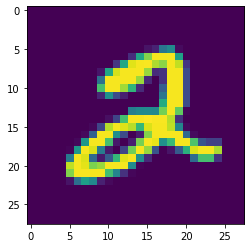

In [ ]:
plt.imshow(train_img[5])
print(train_lab[5])

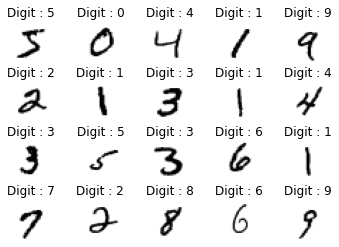

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i], cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
train_img=train_img/255.0
test_img=test_img/255.0

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compiling the sequential model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_img,train_lab,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0629 - accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0468 - accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0369 - accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0324 - accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0254 - accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0189 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0191 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step -

In [ ]:
# Mengakses Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Gunakan untuk menyimpan di Google Drive
model.save('/content/drive/MyDrive/Colab Notebooks/Remote Sensing/Save/model.h5')

In [ ]:
# Gunakan hanya joka lagi men-training model
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Remote Sensing/Save/model.h5')
#compiling the sequential model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Acurracy", loss_and_acc[1])

313/313 - 1s - loss: 0.0992 - accuracy: 0.9830 - 1s/epoch - 4ms/step
Test Loss 0.09917408227920532
Test Acurracy 0.9829999804496765


313/313 [==============================] - 1s 4ms/step
Predicted Value:  7
Sucessful prediction


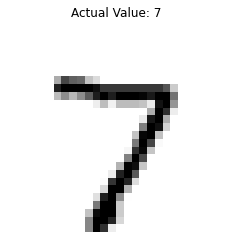

In [ ]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Sucessful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
from IPython.display import Image
Image(test_img[2],width=250,height=250)
#plt.imshow(test_img[2],cmap='gray_r)

In [ ]:
# make a prediction for a new image
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
  # load the image
  img = load_img(filename, grayscale=True, target_size=(28,28))
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28)
  # prepare pixel data
  img = img.astype('float32')
  img = img/255.0
  return img

In [ ]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  x=uploaded[filename]
img=cv2.imread(filename,cv2.IMREAD_UNCHANGED)

Saving number7.jpg to number7.jpg


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Actual Number= 7
1/1 [==============================] - 0s 22ms/step
Predicted Value :  7
Sucessful prediction


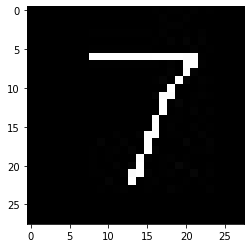

In [ ]:
img = load_image(filename)
label=int(input('Actual Number= '))
predict=model.predict(img)
classify=np.argmax(predict)
print('Predicted Value : ',classify)
if(label==(np.argmax(predict))):
  print('Sucessful prediction')
else:
  print('Unsuccessful prediction')
show=cv2.imread(filename)
plt.imshow(show)